# **The Spark Foundation**

## **Task 1 - Predict the percentage of a student based on the no. of study hours.**

### Author - Shivanshu Bajpai

In [49]:
#Importing all the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
#Importing the dataset

student_data = pd.read_csv("http://bit.ly/w-data")
student_data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


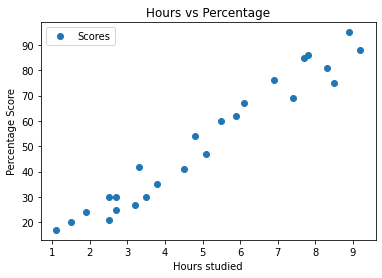

In [51]:
# Plotting the graph

student_data.plot(x = 'Hours', y = 'Scores', style = 'o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours studied')
plt.ylabel('Percentage Score')
plt.show()

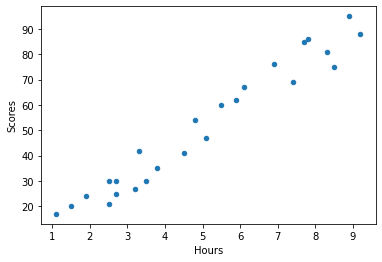

In [52]:
student_data.plot.scatter(x = 'Hours', y = 'Scores')

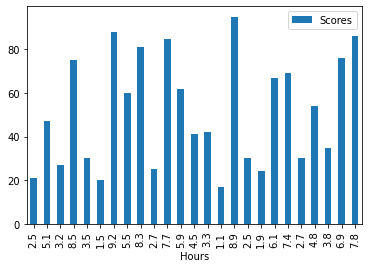

In [53]:
student_data.plot.bar(x = 'Hours', y = 'Scores')

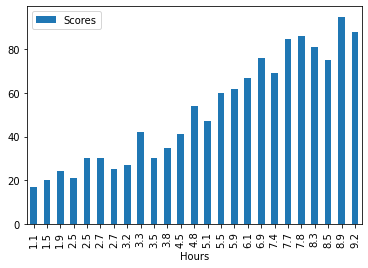

In [54]:
student_data.sort_values(['Hours'], axis = 0,
                         ascending = [True], inplace = True)
student_data.head(10)
student_data.plot.bar(x = 'Hours', y = 'Scores')

### **After plotting different graphs it can be observed that as study hours increases percentage also increases.**

In [55]:
x = student_data.iloc[:, :-1].values
y = student_data.iloc[:, 1].values

In [56]:
# Now we will divide the data into training and testing set

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

### **Training the Algorithm**

In [57]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

regressor.fit(x_train, y_train)
# Training completed

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

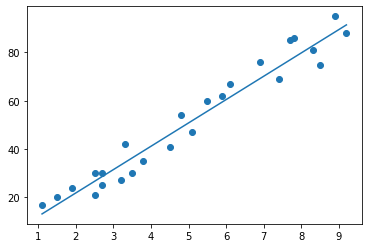

In [58]:
line = regressor.coef_*x+regressor.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

### **Now Our model is ready for testing**

In [59]:
print("Original Scores")
print(y_test)
print("Predicted Score")
y_pred = regressor.predict(x_test)
print(y_pred)

Original Scores
[30 24 85 67 41]
Predicted Score
[28.6177145  20.88803334 76.92822173 61.46885942 46.0094971 ]


In [60]:
df = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
df

,Actual,Predicted
0,30,28.617714
1,24,20.888033
2,85,76.928222
3,67,61.468859
4,41,46.009497


### **Now we will predict the percentage score for custom input**

In [61]:
hours = [[9.25]]
result = regressor.predict(hours)
print(result)

[91.90447898]


### **Evaluating the model**

In [62]:
from sklearn import metrics
print('Mean absolute Error: ', 
      metrics.mean_absolute_error(y_test, y_pred))

Mean absolute Error:  4.621333622532767
